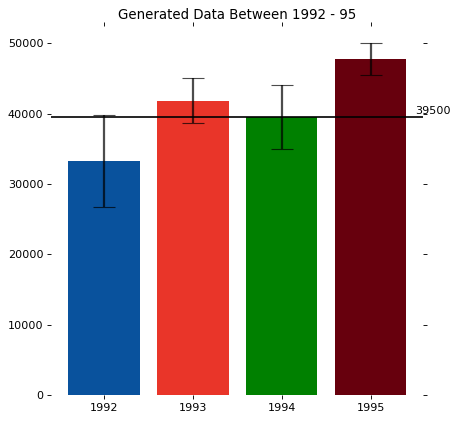

In [15]:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df
df = df.transpose()

df.describe()
# calculating 95% CI for each year 

import math

mean = list(df.mean())

std = list(df.std())

ye1 = []

for i in range (4) :
    ye1.append(1.96*(std[i]/math.sqrt(len(df))))
    
ye1  

nearest = 100
Y = 39500

df_p = pd.DataFrame()

df_p['diff'] = nearest*((Y - df.mean())//nearest)

df_p['sign'] = df_p['diff'].abs()/df_p['diff']

old_range = abs(df_p['diff']).min(), df_p['diff'].abs().max()

new_range = .5,1

df_p['shade'] = df_p['sign']*np.interp(df_p['diff'].abs(), old_range, new_range)
# changing color of the bars with respect to Y


shade = list(df_p['shade'])

from matplotlib import cm

blues = cm.Blues

reds = cm.Reds


# using shades blues when diff is pos
# using Reds when when diff is neg


color = ['White' if  x == 0 else reds(abs(x))
         if x<0 else blues(abs(x)) for x in shade]
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
color[df.columns.get_loc(1994)] = 'green'

plt.bar(range(len(df.columns)), height = df.values.mean(axis = 0), 
        yerr=ye1, error_kw={'capsize': 10, 'elinewidth': 2, 'alpha':0.7}, color = color)

plt.axhline(y=Y, color = 'black', label = 'Y')

plt.text(3.5, 40000, "39500")

plt.xticks(range(len(df.columns)), df.columns)

plt.title('Data generated from normal distribution with 95% CI from 1992 to 1995')

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off',  right='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()